# Week 2 Notebook 4 Data Wrangling with Pandas

Now we want to do some data wrangling with the `Pandas` library using the same penguins data set.

Data wrangling involves cleaning up our data which may not have been recorded correctly, or missing. First we will have to check to see how many "messy" data we have.

In this notebook we are going to perform the following basic data wrangling tasks;

- Exploring data
    - check for missing data
    - check for duplicates
- Cleaning data
    - remove missing data
    - replace missing data with new values
    - replace incorrect data
    - remove duplicate data

First let's read the data into a data frame using `Pandas`.

In [ ]:
# import the pandas library and read into the data frame
import pandas as pd
df = pd.read_csv('penguins_size.csv')

Check that the data was read in successfully:

In [ ]:
df.head()

Notice that we had missing data in the row with index 3.

Running `info()` will show us how many are actually missing.


In [ ]:
# Show info about the data frame
df.info()

So out of the 344 entries, there are null values recorded for `culmen_length_mm`, `culmen_depth_mm`, `flipper_length_mm` and `body_mass_g`, (2 null values for each of the columns), which means the data is missing.  

For the `sex` column there are 10 missing values.






## Finding Missing Values

To find out which rows have missing values, we have to filter the data frame.

First we check which cells have missing values using the `isna()` method, which returns `True` is there is a missing value for each cell and `False` is the value is not null.

In [ ]:
# The isna() function checks whether each cell has a missing value
df.isna()


This will evaluate each row of the dataframe and check if there are any null values in any of the cells.

Next, we may want to check which rows actually have the null values.

In [ ]:
# Find the rows with any 'na' values, by row (axis = 1 indicates to check row by row)
rows_with_na = df[df.isna().any(axis=1)]

# then display the rows
rows_with_na

The output above shows the 10 rows which have missing values. Let's see how we can handle these missing values.

# Handling Missing Values

### Dropping rows with missing values

One way of handling the missing values is just to remove them. For example, we might consider that the 10 rows will not affect the analysis of our data.

We can do this using the pandas `dropna()` method which just drops all rows containing *any* missing values, by default.


In [ ]:
# drop rows that contain missing values in any column
new_df = df.dropna()

# check info on new_df
new_df.info()

There were 10 rows with missing data, so they have been dropped and the new data frame new_df only contains 334 rows.

### Replacing Values

Another option is to replace the missing values with new values. This is known as **imputation** .

The value to be imputed for numeric values is usually the mean or median, and for categorical values we might use the mode, or most frequently occurring value.

In [ ]:
# find the mean culmen length 
mean_culmen_length = df["culmen_length_mm"].mean()

# replace this mean value into the missing values, and modify the original data frame using inplace=True
df["culmen_length_mm"].fillna(mean_culmen_length, inplace = True)


We can combine the two lines in one:

In [ ]:
# do the same for culmen_depth_mm, in one line
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].mean(), inplace = True)

# repeat for flipper_length_mm
df["flipper_length_mm"].fillna(df["flipper_length_mm"].mean(), inplace = True)

# and body_mass_g
df["body_mass_g"].fillna(df["body_mass_g"].mean(), inplace = True)


In [ ]:
# Check which rows still have missing data in any column
rows_with_na = df[df.isna().any(axis=1)]

# then display the rows
rows_with_na

Now we only have the missing data for the `sex` column. We could replace them all with either 'MALE' or 'FEMALE', or we might consider which type they probably are and put the most probable case.

Remember that we could group the data by `species` and `sex`, so let's do that again to explore the data.


In [ ]:
# group the data frame by species, then sex
df.groupby(['species', 'sex']).mean()

Let's just compare the body mass for each species by sex:

In [ ]:
# group by sex and species and view the body mass
df.groupby(['species', 'sex'])['body_mass_g'].mean()

Now we can compare these values with the body mass of the penguins with missing 'sex' values.
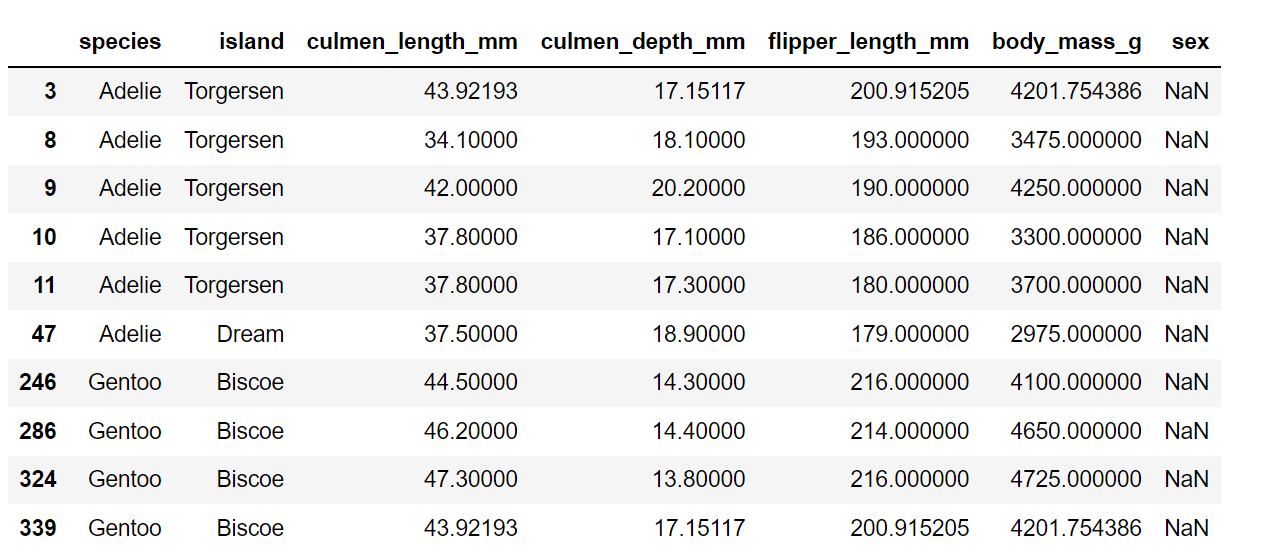

We might assume that for the Adelie penguins with body mass of 4000g and above, they are 'MALE' and those below are 'FEMALE'. 

For the Gentoo penguins, those with missing values all have body mass below 5000g, so we will assume they are all 'FEMALE'.

If there are only a few values, we could specify exactly which rows we want to replace.

For example, for the Gentoo penguin, one of the observations has the sex recorded as a `.` 

First we have to find which one it is.

In [ ]:
# find the line with the incorrect value,
# display the rows of the dataframe where the value is coded as .
df[df['sex'] == '.']


It's the row with index 336 that has the `sex` recorded as `.`. Since the body mass of this observation is 4875 and the mean body mass of Gentoo penguins is 4679 for females and 5484 for males, we could assume that this is actually a female. 

We use the `loc` attribute to specify the row and column to replace the value:

In [ ]:
# use loc to specify the row and column to replace the value

df.loc[336, 'sex'] = 'FEMALE'

If you run the `groupby()` again, you will find that the value has been replaced.

Similarly, we use the `loc` attribute with the rows that we want to change from missing values to 'MALE' and 'FEMALE' respectively.

Looking at the list, we identify the Adelie penguins with body mass that indicate they are most probably MALE or FEMALE.

In [ ]:
# replace the sex of rows with index 3 and 9 with 'MALE'
# because the body mass is greater than 4000

df.loc[[3,9],'sex'] = 'MALE'

# replace the sex of rows with index 8, 10, 11, 47 with 'FEMALE' because the body mass is less than 4000
df.loc[[8, 10, 11, 47],'sex'] = 'FEMALE'

If there are many rows to replace, we could use a conditional expression to find the rows, then replace those rows that match the condition. For the `Gentoo` penguins, let's assume that all of them are 'FEMALE'. So we are going to replace all those which have missing values for `sex` to be FEMALE.

The condition that we want would be:

'species is Gentoo' and 'sex is NULL'

This is written in `pandas`:


In [ ]:
# First check whether we can identify the Gentoo and missing 'sex' value
(df['species']=='Gentoo') & (df['sex'].isna())


Now we use this condition to filter the data frame to find the rows that match this condition.

In [ ]:
# Find the indices of the rows that match this condition 
foundrows = df[(df['species']=='Gentoo') & (df['sex'].isna())].index


print("Missing values for sex and species = 'Gentoo' found here")
foundrows


In [ ]:
# Finally, replace these values at the foundrows

df.loc[foundrows,'sex'] = 'FEMALE'

### Duplicates

Another thing we can do is to remove duplicate data easily. Suppose we add the row at index 1 again to the data frame at the end, and save it to a new data frame called `new_df2`.

In [ ]:
# append the row at location with index 1 to the original df and save it to a new data frame

new_df2 = df.append(df.loc[1])
new_df2

Notice that the new data frame has an extra row now, but it is also indexed 1.
We can add the new row with `ignore_index = True`, to add to the index count.


In [ ]:
# append the row at location with index 1 to the original df and save it to a new data frame

new_df2 = df.append(df.loc[1], ignore_index = True)
new_df2

Now we can check if we have duplicate data (and we should, because we copied the first row and put it at the end)

In [ ]:
# Check if any of the rows are duplicated
new_df2.duplicated()

Notice that running the operation to check whether any row is duplicated returns true for the last row. So we want to remove the duplicated row.


In [ ]:
# print the duplicated row
new_df2[new_df2.duplicated()]

In [ ]:
# drop the duplicated row
new_df2.drop_duplicates(inplace = True)
new_df2

Now you can see the duplicated row 344 has been removed.

We have covered some of the basic methods of cleaning data. There are many more, of course, and data scientists do spend a lot of time exploring and wrangling data before they can create their models.

Let's do some exercises to review.

## Exercises

Let's try out these data wrangling operations with the Iris dataset.

You should have downloaded the iris_csv.csv dataset into your working directory from the previous exercise. 

In [ ]:
# We should always start with the import, although it may have been run above
import pandas as pd

In [ ]:
# read the data into a dataframe called irisdf
irisdf = pd.read_csv('iris_csv.csv')

**Q1. Missing Values**

Check if there are any missing values in the `irisdf` data set.

In [ ]:
# Q1 Answer


**Q2. Find Duplicates**

There are three duplicate rows, display the rows.

In [ ]:
#Q2 Answer


**Q3. Calculate Mean**

Find the mean `sepallength` and store it in a variable called `mean_sepallength`

In [ ]:
#Q3 answer


**Q4. Set Value**

Set the `sepallength` of the row with index 34 to the mean value found.

In [ ]:
# Q4 Answer


Check whether the number of duplicate rows has decreased by displaying the duplicated rows again. You can execute your answer to Q2 again) 

**Q5. Drop Duplicates**

Drop the rows with duplicates

In [ ]:
# Q5 answer


Now check if there are any more duplicate values by running your answer to Q2 again.

**Q6. Set as NA**

Set the `sepalwidth` of the row with index 34 to `pd.NA` (which is pandas for NULL value)

In [ ]:
# Q6 Answer


We should be able to view the contents of the row with index 34 using the `loc` attribute:

In [ ]:
irisdf.loc[34]

**Q7. Find Rows with Missing Values**

Find the rows with *any* NA values

In [ ]:
# Q7 Answer
# Find the rows with any 'na' values, by row (axis = 1 indicates to check row by row)



**Q8. Drop Rows with Missing Values**

Now drop the rows with missing values with the argument `inplace = True`

In [ ]:
# Q8 answer


Check whether there are any more rows with NA values by running your answer to Q7 again.